Aout me: My name is  Mohamed Touati I'm Data scientist ,AI Research Engineer | Deep Learning and Computer Vision PhD Student. for any request you can contact me in my Linkedin profile : https://www.linkedin.com/in/mohamed-touati-enit/

Computer Vision now is  is one of the main technologies that enables the digital world to interact with the physical world. 

# Image Processing with Python

In this notebook we wiil learn how to deal with image , work with python for image processing ,understand data types , manipulate and prepare images for analysis such as segmentation ... 

**Principals libraries:**

- SKIMAGE
- OPENCV
- MAHOTAS
-MATPLOTLIB


## Importing packages 


In [0]:
%matplotlib inline 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage
from skimage import data 


## Load Image 


**load an example image from skimage**

In [0]:
camera=data.camera()
camera

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [0]:
type(camera)

numpy.ndarray

In [0]:
camera.shape

(512, 512)

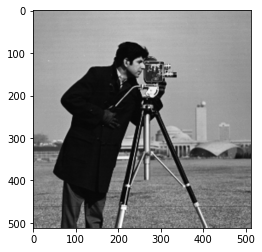

In [0]:
#display image 
plt.imshow(camera,'gray')

In [0]:
#information about our image 
print("image shape array %d x %d "%(camera.shape[0],camera.shape[1]))
print('Number of pixels %d'%(camera.size))
print('Range of pixel: [%d ,%d]'%(camera.min(), camera.max()))
print('avg pixel value: %2f'%(camera.mean()))

image shape array 512 x 512 
Number of pixels 262144
Range of pixel: [0 ,255]
avg pixel value: 118.314003


**load your own image**


In [0]:
 # mout the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#  the directory where i'm working 
cd /content/drive/My Drive/Tutorial_python_medtouati/Image-processing

/content/drive/My Drive/Tutorial_python_medtouati/Image-processing


In [0]:
from skimage import io
colony=io.imread('Yeast_colonies_array.jpg')
print(type(colony)) # colony.type
print(colony.shape)

<class 'numpy.ndarray'>
(1257, 1846, 3)


Text(0.5, 1.0, '1-channel')

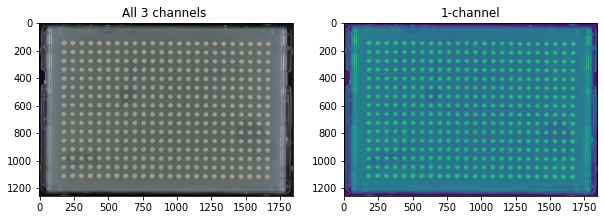

In [0]:
plt.figure(figsize=(10,10))
#all channels 
plt.subplot(121) # rows| columns | num pf sub images
plt.imshow(colony[:,:,:]) # or we just write io.imshow(colony)
plt.title('All 3 channels ')
#one channel
plt.subplot(122)
plt.imshow(colony[:,:,0]) 
plt.title('1-channel')


## Image Manipulation

###  Getting and Setting pixel values 

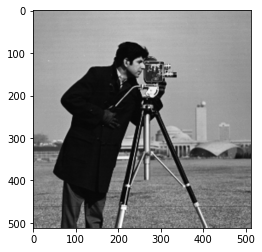

In [0]:
# get the value of pixel in row 10 column 10 
camera=data.camera()
camera[10,10]
plt.imshow(camera,"gray")

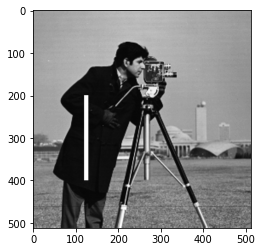

In [0]:
# set the value of pixels between  row 200 to 400 and column 120 to 130  to white
camera[200:400,120:130]=255
plt.imshow(camera,'gray')

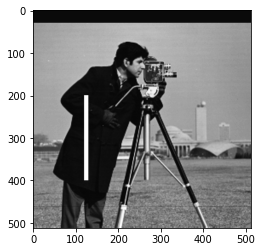

In [0]:
# set the first 30 lines to black 
camera[:30]=10
plt.imshow(camera,'gray')

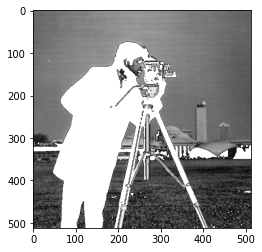

In [0]:
# set to white pixels where a mask(threshold) is true
camera=data.camera()
mask=camera<87
camera[mask]=255
plt.imshow(camera,"gray")

<class 'numpy.ndarray'>
(300, 451, 3)


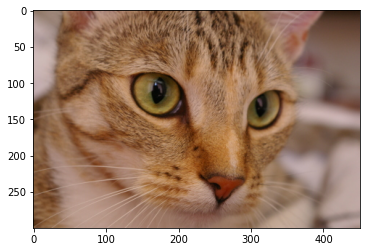

In [0]:
# change colours for real images
cat=data.chelsea()
print(type(cat))
print(cat.shape)
plt.imshow(cat)


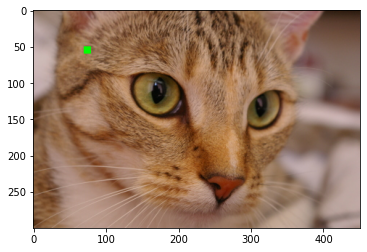

In [0]:
# set a pixel to green
# [red,green,blue]
cat[50:60,70:80]=[0,255,0]
plt.imshow(cat)

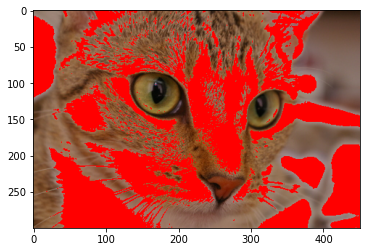

In [0]:
# set brighter pixels to red 
cat=data.chelsea()
red_cat=cat.copy()
reedish=cat[:,:,0]>160  # 0 for R channel , 1 for G channel and 2 for B channel
red_cat[reedish]=[255,0,0]  # 255 intensity fo pixels  for Red channel 
plt.imshow(red_cat)

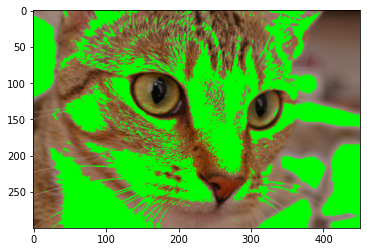

In [0]:
# set brighter pixels to green 
cat=data.chelsea()
red_cat=cat.copy()
reedish=cat[:,:,0]>160
red_cat[reedish]=[0,255,0]
plt.imshow(red_cat)

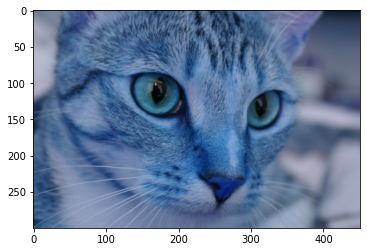

In [0]:
#change RGB to BGR (for opencv)
cat=data.chelsea() # inset the cat image with skimage in RGB 
# we playing on color space with changing the value of channels from 0 to 2 
BGR_cat=cat[:,:,::-1] # [x pixels, y pixels , channels inverted ] so we get BGR    
plt.imshow(BGR_cat)  # display the BGR_cat image 

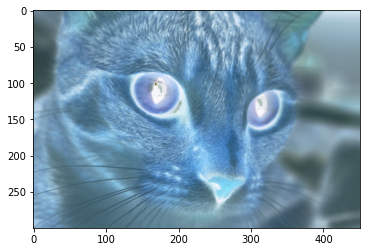

In [0]:
# invert an image 
from skimage import util # Invert the intensity range of the input image, 
invert_cat=util.invert(cat)
plt.imshow(invert_cat)
#so that the dtype maximum is now the dtype minimum, and vice-versa

we playing with the data that is in the image as apposed to swapping around the ratios so it's a difference between the ration of colors versus the actual intensity of each of the colors 

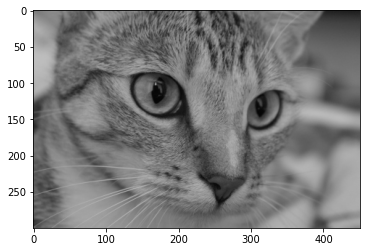

In [0]:
# convert to and  from RBG 
from skimage.color import rgb2gray, gray2rgb
graycat=rgb2gray(cat)
newcat=gray2rgb(graycat)
plt.imshow(graycat)
plt.imshow(newcat)

### converting Image dtype 

`img_as_float`  
 Convert to 64-bit floating point.

---
`img_as_ubyte`     
 Convert to 8-bit uint.

---

`img_as_uint`       
Convert to 16-bit uint.

---

`img_as_int`          
        Convert to 16-bit int.

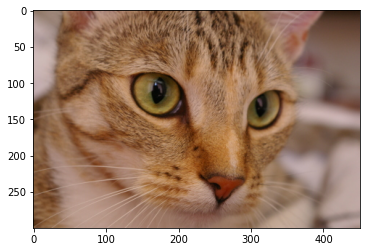

In [0]:
from skimage import img_as_float ,img_as_ubyte 
float_cat=img_as_float(cat)  #  Convert to 64-bit floating point.
uint_cat=img_as_ubyte(float_cat)   #  Convert to 8-bit uint.
plt.imshow(uint_cat) # the same image as cat with a different type 

### Rescale Intensity 

In [0]:
from skimage  import exposure 
rescale_cat=exposure.rescale_intensity(cat,in_range="uint8") 
print("cat min:",cat.min(),"\t\tcat max:",cat.max())
print("rescale_cat min:",rescale_cat.min(),"\trescale_cat max:",rescale_cat.max())

cat min: 0 		cat max: 231
rescale_cat min: 0 	rescale_cat max: 231


In [0]:
rescale_cat=exposure.rescale_intensity(cat,in_range="uint10") 
print("cat min:",cat.min(),"\t\tcat max:",cat.max())
print("rescale_cat min:",rescale_cat.min(),"\trescale_cat max:",rescale_cat.max())

cat min: 0 		cat max: 231
rescale_cat min: 0 	rescale_cat max: 57


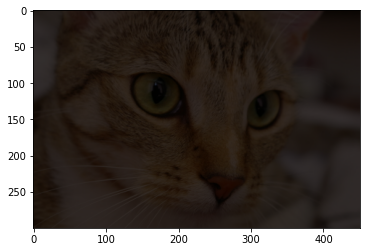

In [0]:
plt.imshow(rescale_cat)

### Display Image histograms

(array([51199.,  8554.,  6922.,  8834., 31923., 43625., 84777., 23862.,
         1470.,   978.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

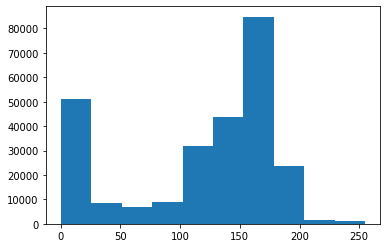

In [0]:
img =data.camera()
plt.hist(img.ravel(), bins=None) # histtype='step' #color='blue'

(array([ 102.,   76.,   89.,  114.,  159.,  209.,  335., 1173., 3523.,
        5129., 4490., 4980., 5762., 6212., 6067., 4480., 2805., 1375.,
         860.,  625.,  498.,  503.,  426.,  430.,  379.,  398.,  418.,
         402.,  358.,  362.,  354.,  349.,  355.,  381.,  371.,  379.,
         348.,  375.,  390.,  398.,  394.,  349.,  327.,  345.,  311.,
         263.,  256.,  279.,  274.,  258.,  258.,  245.,  242.,  261.,
         265.,  268.,  285.,  276.,  334.,  308.,  337.,  309.,  313.,
         370.,  276.,  301.,  245.,  230.,  244.,  242.,  222.,  217.,
         230.,  238.,  235.,  224.,  205.,  220.,  213.,  208.,  164.,
         203.,  222.,  216.,  230.,  243.,  251.,  281.,  315.,  328.,
         334.,  327.,  333.,  381.,  417.,  420.,  473.,  525.,  573.,
         620.,  650.,  687.,  727.,  760.,  803.,  816.,  924.,  986.,
         981., 1002., 1085., 1070., 1174., 1202., 1219., 1190., 1314.,
        1321., 1432., 1399., 1453., 1539., 1477., 1509., 1598., 1592.,
      

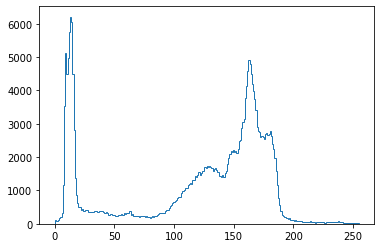

In [0]:
img =data.camera()
plt.hist(img.ravel(), bins=256,histtype='step')

### Image Segmentation 

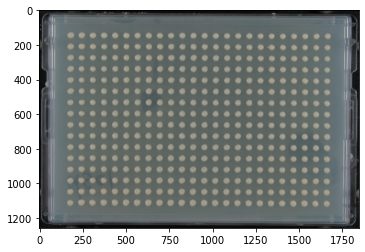

In [0]:
 # use colony image 
colony=io.imread('Yeast_colonies_array.jpg')
plt.imshow(colony)

(array([6.00000e+01, 6.00000e+01, 1.09000e+02, 1.66000e+02, 3.21000e+02,
        7.43000e+02, 1.39100e+03, 2.40500e+03, 1.40100e+03, 4.11200e+03,
        4.94200e+03, 6.02600e+03, 6.41000e+03, 7.02600e+03, 7.04300e+03,
        6.48400e+03, 5.87400e+03, 5.75200e+03, 5.25100e+03, 4.74700e+03,
        4.28500e+03, 3.38700e+03, 3.15900e+03, 2.23800e+03, 2.52900e+03,
        2.01900e+03, 1.85900e+03, 1.48100e+03, 1.45300e+03, 1.33900e+03,
        1.33700e+03, 1.21500e+03, 1.29100e+03, 1.27400e+03, 1.23200e+03,
        1.13400e+03, 1.12600e+03, 1.27000e+03, 1.17900e+03, 1.31800e+03,
        1.25500e+03, 1.49100e+03, 1.51900e+03, 1.77600e+03, 1.89500e+03,
        2.06800e+03, 2.11200e+03, 2.62100e+03, 2.82800e+03, 3.12300e+03,
        3.23500e+03, 3.31100e+03, 3.54000e+03, 3.39100e+03, 3.72100e+03,
        3.98600e+03, 4.06400e+03, 3.79900e+03, 4.16100e+03, 4.21600e+03,
        4.22400e+03, 3.76600e+03, 3.97600e+03, 3.44500e+03, 3.46000e+03,
        3.10000e+03, 3.03000e+03, 2.76200e+03, 2.52

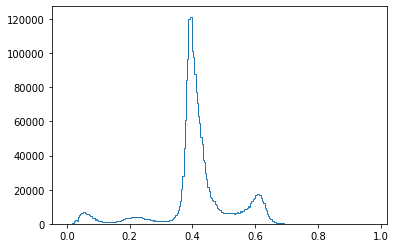

In [0]:
# let's convert our iamge to gray 
from skimage.color import rgb2gray, gray2rgb
gray_colony=rgb2gray(colony)
plt.hist(gray_colony.ravel(), bins=256,histtype='step')

Text(0.5, 1.0, 'gray_colony with threshold')

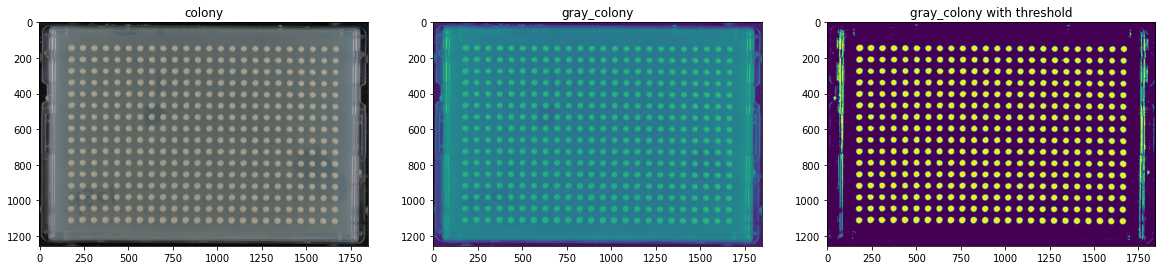

In [0]:
# use the threshold 
plt.figure(figsize=(20,30))

plt.subplot(131)
plt.imshow(colony)
plt.title('colony')

plt.subplot(132)
plt.imshow(gray_colony)
plt.title('gray_colony')

plt.subplot(133)
plt.imshow(gray_colony>0.5) # threshold betweek 0 and 1 cause gray_colony values  are in [0,1]
plt.title('gray_colony with threshold') # we see much better our object 

#### Edge detector 

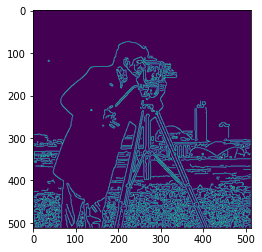

In [0]:
# we can use the detection high contrast regions 
from skimage.feature import canny
img_edge=canny(img)
plt.imshow(img_edge)

In [0]:
import  scipy.ndimage as ndi
img_edge=canny(img)
img_filled=ndi.binary_fill_holes(img_edge)


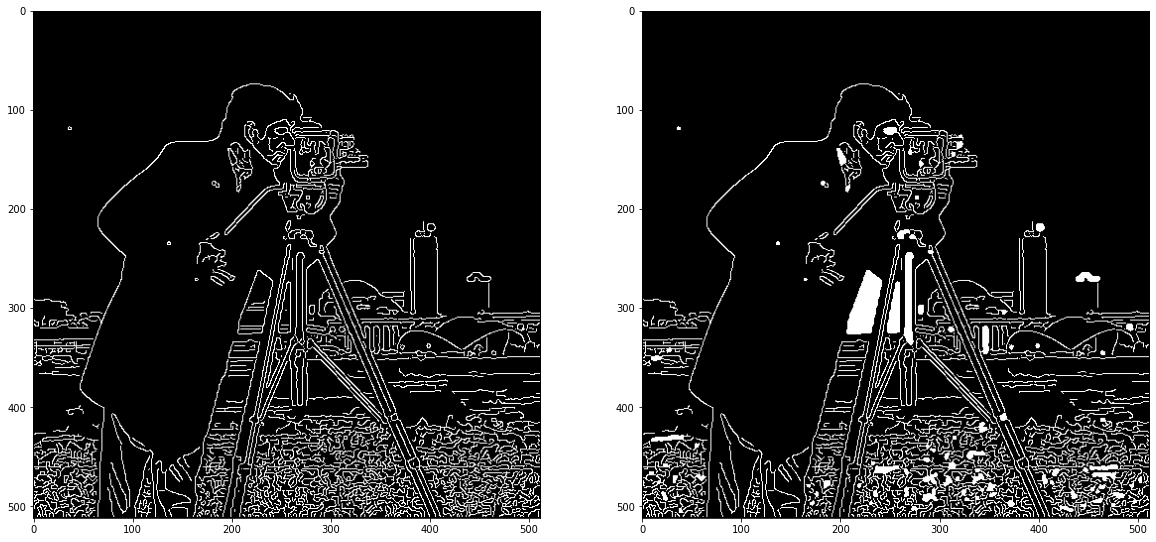

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img_edge,"gray")
plt.subplot(122)
plt.imshow(img_filled,"gray")



Text(0.5, 1.0, 'img_filled_cat')

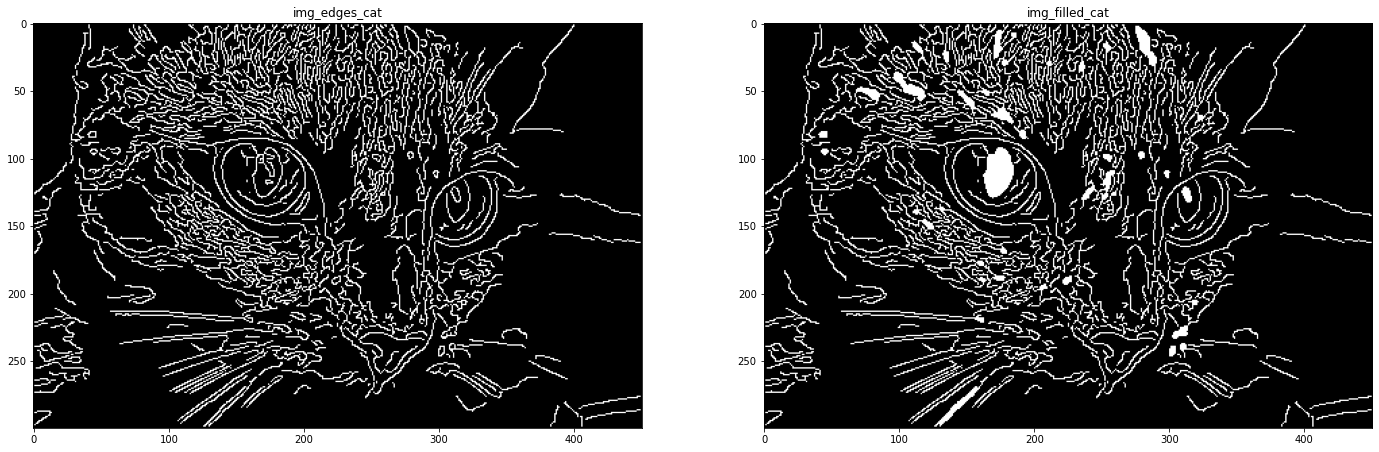

In [0]:
# canny edge detector on cat
from skimage.feature import canny
import  scipy.ndimage as ndi
cat =data.chelsea()
img_edges_cat=canny(cat[:,:,0]/255.)  # 0 to 1 value 
img_filled_cat=ndi.binary_fill_holes(img_edges_cat)
plt.figure(figsize=(24,18))
plt.subplot(121)
plt.title("img_edges_cat")
plt.imshow(img_edges_cat,"gray")
plt.subplot(122)
plt.imshow(img_filled_cat,"gray")
plt.title('img_filled_cat')


#### Watershed Algorithm 

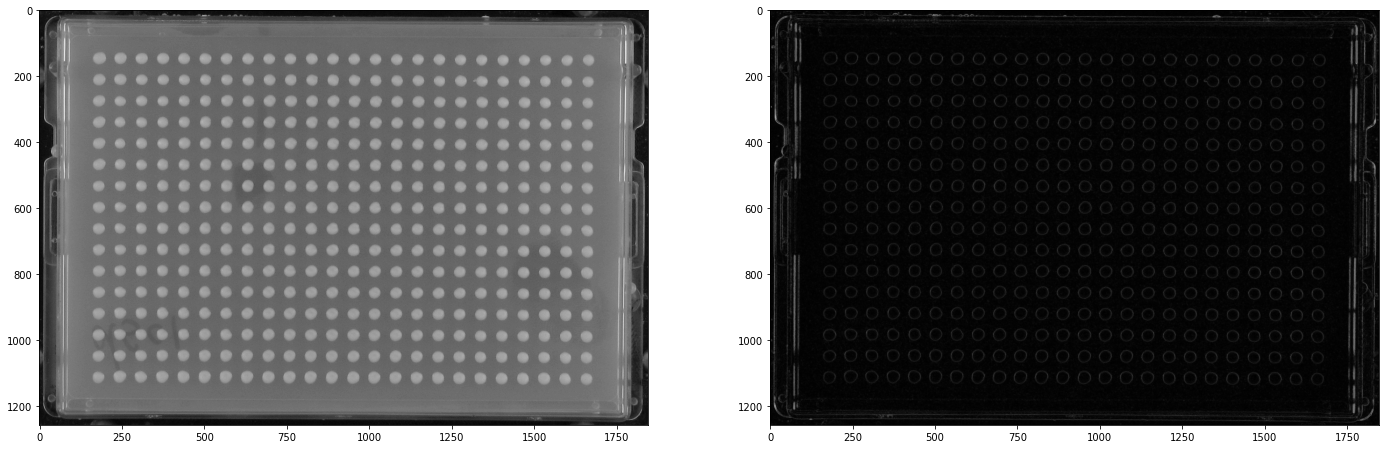

In [0]:
from skimage.filters import sobel 
from skimage.morphology import watershed
#evaluation map 
evaluation_map=sobel(gray_colony) #gray_colony is 2dim array however colony is a 3 dim array 
plt.figure(figsize=(24,18))
plt.subplot(121)
plt.imshow(gray_colony,"gray")
plt.subplot(122)
plt.imshow(evaluation_map,'gray')

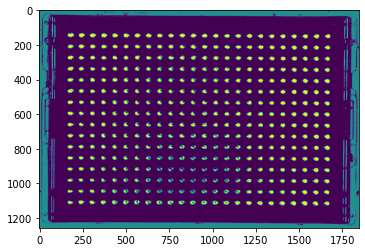

In [0]:
# Separate pixels into 3 classes 
# algorithms uses user define markers 
markers=np.zeros_like(gray_colony)
markers[gray_colony<0.30]=1
markers[gray_colony>0.60]=2
plt.imshow(markers) 
# in tis image we create a new markers and  we made it in the shape of our image
#we plotted in one markers yellow all the ones that are below between 0.30 for those whaite and black 
 #there is middles class between 0.30 and 0.55 
 #and then into above class above 0.60  that's corresponds to like the dark blue , the green blue and the yellow 
 #we can use our watershed , sobel and markers to segment 

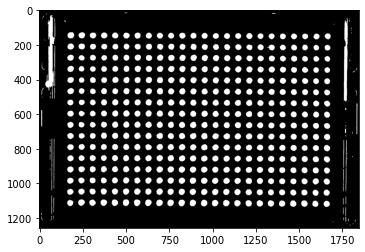

In [0]:
# Segmentation with watershed transform
segmentation=watershed(evaluation_map,markers)
# set backgroud pixels to 0 
segmentation[segmentation==0]=0
plt.imshow(segmentation,'gray')
# we're feeding it  ,the evaluation map 

#### label semgentation object 

1


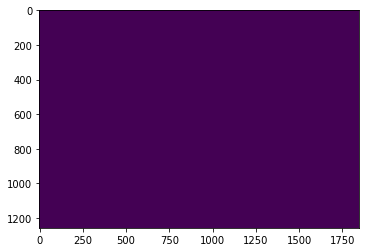

In [0]:
#label segmentation  obejcts 
label_colony, number =ndi.label(gray_colony)
print(number)
plt.imshow(label_colony)